# Script for plotting Media Data
---

In [16]:
#import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
urls = pd.read_pickle('/Users/trinidadbosch/Desktop/SEDS/MA-Thesis/thesis-env/Media Cloud/scripts/urls-no-duplicates.pkl')

In [3]:
## MEdia attention that is shifting, "media pays attention as the technology advances"
# Convert 'publish_date' to datetime
urls['publish_date'] = pd.to_datetime(urls['publish_date'], errors='coerce')

# Extract year-month
urls['year_month'] = urls['publish_date'].dt.to_period('M')

# Filter for the first 5 years
first_5_years_df = urls[urls['publish_date'].dt.year <= urls['publish_date'].dt.year.min() + 4]

# Filter for the next 5 years
next_5_years_df = urls[urls['publish_date'].dt.year > urls['publish_date'].dt.year.min() + 4]

In [4]:
#Check max date
max_date = urls['publish_date'].max()
print(max_date)

2023-11-18 22:38:08


In [19]:
## checking some gaps in my data
# Specific month you're interested in
specific_month_str = '2022-02'  

# Convert the specific month string to a Period object
specific_month = pd.Period(specific_month_str, freq='M')

# Filtering data from the first 5 years dataset
specific_data_first_5_years = first_5_years_df[first_5_years_df['year_month'] == specific_month]
print("Data from the first 5 years for", specific_month_str)
print(specific_data_first_5_years)


Data from the first 5 years for 2022-02
Empty DataFrame
Columns: [ap_syndicated, collect_date, feeds, guid, language, media_id, media_name, media_url, metadata, processed_stories_id, publish_date, stories_id, story_tags, title, url, word_count, year_month, date]
Index: []


In [20]:
specific_data_first_5_years

,ap_syndicated,collect_date,feeds,guid,language,media_id,media_name,media_url,metadata,processed_stories_id,publish_date,stories_id,story_tags,title,url,word_count,year_month,date


/var/folders/vk/yr_rw4912x38st74np992k1r0000gn/T/ipykernel_34529/3718597725.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['date'] = pd.to_datetime(df_main['year_month'].astype(str))
/var/folders/vk/yr_rw4912x38st74np992k1r0000gn/T/ipykernel_34529/3718597725.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zoom['date'] = pd.to_datetime(df_zoom['year_month'].astype(str))


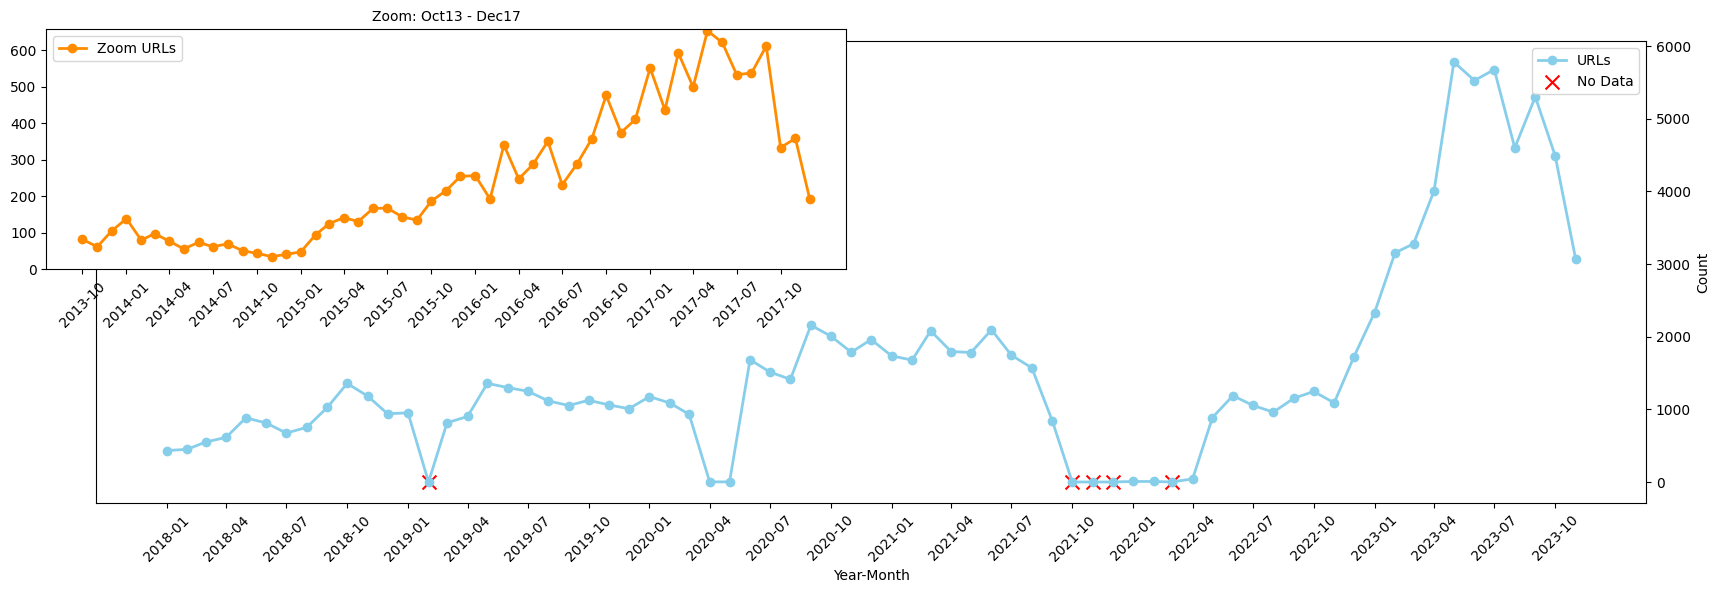

In [39]:
## plotting with function
def plot_with_zoom_in_section_and_missing_data_markers(df_main, df_zoom, title_main, title_zoom, extra_y_space=10):
     """
    Function that takes two dataframes (df_main and df_zoom), titles for the main and zoomed-in plots, and optional extra y-space, 
    and plots a comparison of URLs over time with a zoomed-in section and markers for missing data.

    Parameters:
    - df_main: DataFrame containing main data to be plotted
    - df_zoom: DataFrame containing data for the zoomed-in section
    - title_main: Title for the main plot
    - title_zoom: Title for the zoomed-in plot
    - extra_y_space: Optional, additional y-space for the zoomed-in plot (default is 10)

    Returns:
    - None
    """
    fig, ax_main = plt.subplots(figsize=(20, 6))
    
    # Main plot
    df_main['date'] = pd.to_datetime(df_main['year_month'].astype(str))
    min_date_main = df_main['date'].min()
    max_date_main = df_main['date'].max()
    all_dates_main = pd.date_range(start=min_date_main, end=max_date_main, freq='MS')
    counts_main = df_main.groupby('date').size().reindex(all_dates_main, fill_value=0)
    ax_main.plot(counts_main.index, counts_main, color='skyblue', marker='o', linestyle='-', linewidth=2, label='URLs')
    
    # Highlight missing data in the main plot
    missing_dates_main = counts_main[counts_main == 0]
    ax_main.scatter(missing_dates_main.index, [0]*len(missing_dates_main), color='red', marker='x', s=100, label='No Data')
    # Move y-axis of the main plot to the right
    ax_main.yaxis.tick_right()
    ax_main.yaxis.set_label_position("right")
    # Zoomed-in plot
    ax_zoom = fig.add_axes([0.1, 0.5, 0.4, 0.4])  # Move to the left
    df_zoom['date'] = pd.to_datetime(df_zoom['year_month'].astype(str))
    min_date_zoom = df_zoom['date'].min()
    max_date_zoom = df_zoom['date'].max()
    all_dates_zoom = pd.date_range(start=min_date_zoom, end=max_date_zoom, freq='MS')
    counts_zoom = df_zoom.groupby('date').size().reindex(all_dates_zoom, fill_value=0)
    ax_zoom.plot(counts_zoom.index, counts_zoom, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Zoom URLs')
    
    # Highlight missing data in the zoomed-in plot
   # missing_dates_zoom = counts_zoom[counts_zoom == 0]
  #  ax_zoom.scatter(missing_dates_zoom.index, [0]*len(missing_dates_zoom), color='red', marker='x', s=100, label='No Data')
    
    ax_main.set_title(title_main)
    ax_zoom.set_title(title_zoom, fontsize=10)
    ax_main.set_xlabel('Year-Month')
    ax_main.set_ylabel('Count')
    
    # Setup x-ticks
    quarters_main = pd.date_range(start=min_date_main, end=max_date_main, freq='QS')
    ax_main.set_xticks(quarters_main)
    ax_main.set_xticklabels([q.strftime('%Y-%m') for q in quarters_main], rotation=45)
    
    quarters_zoom = pd.date_range(start=min_date_zoom, end=max_date_zoom, freq='QS')
    ax_zoom.set_xticks(quarters_zoom)
    ax_zoom.set_xticklabels([q.strftime('%Y-%m') for q in quarters_zoom], rotation=45)
    
    # Adjust y-axis for the zoomed-in plot based on its own data
    ymax_zoom = counts_zoom.max() + extra_y_space
    ax_zoom.set_ylim(0, ymax_zoom)
    
    # Handle legends to avoid duplicate labels
    handles_main, labels_main = ax_main.get_legend_handles_labels()
    by_label_main = dict(zip(labels_main, handles_main))
    ax_main.legend(by_label_main.values(), by_label_main.keys())
    
    handles_zoom, labels_zoom = ax_zoom.get_legend_handles_labels()
    by_label_zoom = dict(zip(labels_zoom, handles_zoom))
    ax_zoom.legend(by_label_zoom.values(), by_label_zoom.keys())

    plt.savefig('urls-year-zoom.svg', format='svg')
    plt.show()

##calling function
plot_with_zoom_in_section_and_missing_data_markers(next_5_years_df, first_5_years_df, '', 'Zoom: Oct13 - Dec17', extra_y_space=5)

In [18]:
data = pd.read_pickle('/Users/trinidadbosch/Desktop/SEDS/MA-Thesis/thesis-env/Media Cloud/scripts/data-media-work.pkl')

### Plotting urls vs scraped

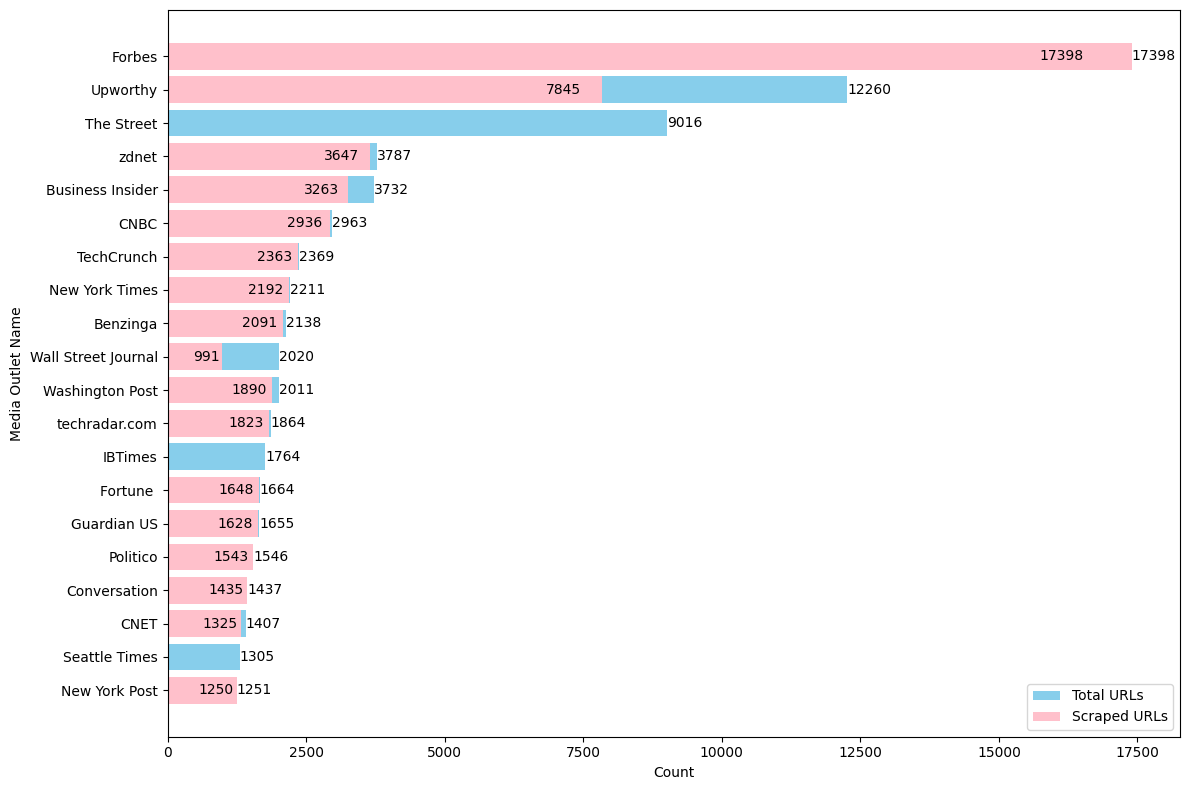

In [15]:
### 'urls' for total URLs and 'data' for scraped URLs.

# Calculate total counts per media outlet
total_counts = urls['media_name'].value_counts()

# Calculate scraped counts per media outlet
scraped_counts = data['media_name'].value_counts()

# Select the top 20 media outlets from the total counts for a focused plot
top_20_media = total_counts.head(20)

# Prepare a DataFrame to hold both total and scraped counts for the top 20 media outlets
top_20_df = pd.DataFrame({
    'Total': top_20_media,
    'Scraped': scraped_counts.reindex(top_20_media.index).fillna(0)  # Match scraped counts to top 20 and fill missing values with 0
})

# Sort the DataFrame in descending order by 'Total' count
top_20_df_sorted = top_20_df.sort_values(by='Total', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))

# Total counts bar
bars_total = plt.barh(top_20_df_sorted.index, top_20_df_sorted['Total'], color='skyblue', label='Total URLs')

# Scraped counts bar (overlay on the total counts)
bars_scraped = plt.barh(top_20_df_sorted.index, top_20_df_sorted['Scraped'], color='pink', label='Scraped URLs')

plt.xlabel('Count')
plt.ylabel('Media Outlet Name')
#plt.title('Top 20 Media Outlets by URL Count and Scraped Proportion')

# Add total count outside each total bar
for bar in bars_total:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left')  # Place text to the right of the bar

# Add scraped count inside each scraped bar for clarity
for bar in bars_scraped:
    width = bar.get_width()
    # Only add text if the bar is wide enough
    if width > 0:
        plt.text(width - (0.05 * width), bar.get_y() + bar.get_height()/2, f'{int(width)}', 
                 va='center', ha='right')  # Text inside, adjusted position, and white for visibility

plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('top20-media-outlet.svg', format='svg')
plt.show()


In [13]:
urls.columns

Index(['ap_syndicated', 'collect_date', 'feeds', 'guid', 'language',
       'media_id', 'media_name', 'media_url', 'metadata',
       'processed_stories_id', 'publish_date', 'stories_id', 'story_tags',
       'title', 'url', 'word_count', 'year_month'],
      dtype='object')

In [14]:
## Manually inspecting The Street urls to make a decision
the_street_rows = urls[urls['media_name'] == 'The Street']
the_street_rows.url

23        https://www.thestreet.com/investing/ford-rises...
24        https://www.thestreet.com/press-releases/world...
26        https://www.thestreet.com/press-releases/ford-...
27        https://www.thestreet.com/press-releases/micro...
28        https://www.thestreet.com/press-releases/mitek...
                                ...                        
167833    https://www.thestreet.com/investing/cathie-woo...
167975    https://www.thestreet.com/technology/elon-musk...
168031    https://www.thestreet.com/technology/elon-musk...
168122    https://www.thestreet.com/investing/startups-m...
186821    https://www.thestreet.com/investing/bitcoin/ti...
Name: url, Length: 9016, dtype: object